<a href="https://colab.research.google.com/github/JonEricBuckman/LSTM-Tornadoes/blob/main/LSTM_Tornado1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# univariate lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [42]:
df = pd.read_csv("https://raw.githubusercontent.com/JonEricBuckman/LSTM-Tornadoes/main/tornado_history.csv")

In [43]:
raw_seq = df.pop('Ann.')

In [44]:
raw_seq.head()

0    23
1    43
2    22
3    54
4    53
Name: Ann., dtype: int64

In [45]:
raw_seq.tail()

66     58
67     85
68     43
69    149
70     39
Name: Ann., dtype: int64

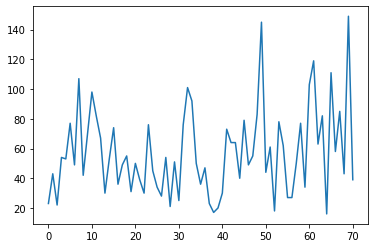

In [46]:
plt.plot(raw_seq)

In [47]:
# choose a number of time steps
n_steps = 5
# split into samples
X, y = split_sequence(raw_seq, n_steps)

In [48]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [49]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [50]:
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [51]:
# demonstrate prediction
x_input = array([58, 85, 43, 149, 39])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[82.64179]]
